In [107]:
import os
import sys

# Quick setup - replace with your actual dataset name
DATASET_NAME = "edhec-input"  # Your dataset name here
dataset_path = f"/kaggle/input/{DATASET_NAME}"

# Add modules to path
sys.path.insert(0, f"{dataset_path}/modules_ex")

# Set data path for easy access
DATA_PATH = f"{dataset_path}/data"

print("✅ Setup complete!")

✅ Setup complete!


In [108]:
import pandas as pd
prices = pd.read_csv(f"{DATA_PATH}/sample_prices.csv")
# prices = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv")
returns = prices.pct_change()
returns.shape

(13, 2)

In [109]:
returns

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [110]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [111]:
deviations = returns - returns.mean()
squared_deviations = deviations ** 2
variance = squared_deviations.mean()

import numpy as np
volatility = np.sqrt(variance)
volatility


BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [112]:
returns.shape
number_of_observations = returns.shape[0]
variance = squared_deviations.sum() / (number_of_observations - 1)
volatility = variance ** 0.5

In [113]:
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [114]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

import new monthly return data

In [115]:
import pandas as pd
returns = pd.read_csv(f"{DATA_PATH}/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, date_format= '%YYYY%MM', na_values=-99.99)

In [116]:
returns.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [117]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [118]:
returns = returns / 100
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [119]:
returns.columns = ['small caps', 'large caps']

In [120]:
returns.head()

,small caps,large caps
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


<Axes: >

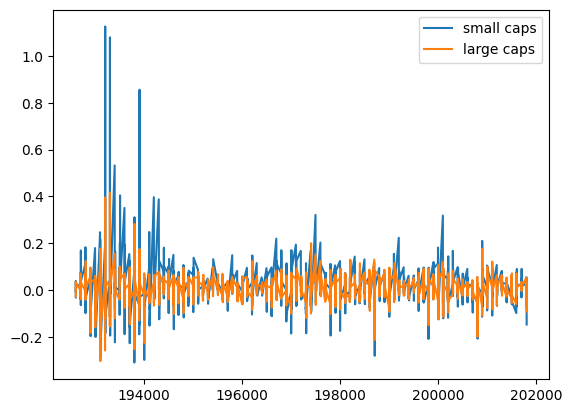

In [121]:
import matplotlib as mat
returns.plot.line()

In [122]:
returns.std()

small caps    0.097197
large caps    0.056325
dtype: float64

In [123]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

small caps    0.336701
large caps    0.195116
dtype: float64

In [124]:
no_of_months = returns.shape[0]
return_per_month = (returns+1).prod() ** (1/no_of_months) - 1
total_return = (returns+1).prod() -1
return_per_month

small caps    0.011860
large caps    0.007859
dtype: float64

In [125]:
annualized_vol

small caps    0.336701
large caps    0.195116
dtype: float64

In [126]:
annualized_return = (returns+1).prod()**(12/no_of_months) - 1
annualized_return

small caps    0.151977
large caps    0.098490
dtype: float64

In [127]:
total_return

small caps    482560.492968
large caps      5937.101622
dtype: float64

In [128]:
annualized_return / annualized_vol

small caps    0.451370
large caps    0.504778
dtype: float64

In [129]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_return
sharpe_ratio

small caps    0.802602
large caps    0.695401
dtype: float64

/tmp/ipykernel_35/1046762477.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv(f"{DATA_PATH}/Portfolios_Formed_on_ME_monthly_EW.csv",


<Axes: >

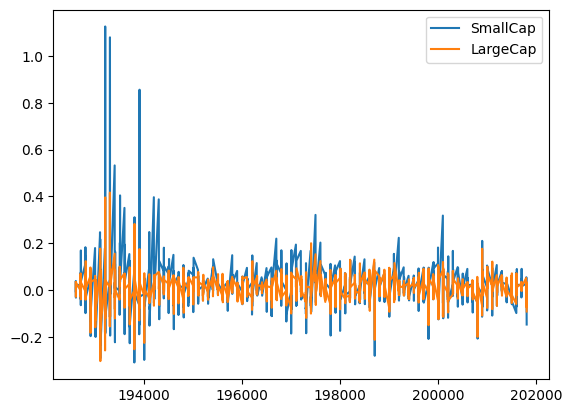

In [130]:
import pandas as pd

me_m = pd.read_csv(f"{DATA_PATH}/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 20', 'Hi 20']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [131]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [132]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [140]:
rets.index
rets.loc["1999":"2015"]

,SmallCap,LargeCap
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015
